In [106]:
import math
import random
import matplotlib.pyplot as plt
from random import seed
from random import randrange
import itertools
import numpy as np

class KNN_Regressor:
    # train_X : Feature Vectors
    # train_Y : Target Vector
    # K_N : Neighbours to consider
    def __init__(self, train_X, target_y, K):
        self.train_X = train_X
        self.train_y = target_y
        self.K_N = K


    def predict(self, test_x):
        #Function to predict values for given test point
        
        dist_list = [] #list of distance test point from each training points
        for i in range(0, len(self.train_X)):
            dist_list.append([i, self.get_dist(self.train_X[i], test_x)])# append distance list
        
        #sort list in accending order of distance magnitude 
        dist_list.sort(key = lambda x : x[1]) 
        
        # get the indices of the k-nearest neighbors
        near_indices = [dist_l[0] for dist_l in dist_list[:self.K_N]]

        #predict the target value using cal_interpolation
        y_predict = self.cal_value(near_indices)
        
       
        
        #return the predicted value
        return y_predict
    
    def cal_value(self, index_list):
        # Function to compute average value using k-nearest neighbours
        y_pred = 0
        for i in index_list:
            y_pred += self.train_y[i]            
        return y_pred/len(index_list)

    
    def get_dist(self, X_1, X_2):
        #Function to calculate eucledian distance between data vectors
        dist = 0
        for i in range(0, len(X_1)):
            dist += (X_1[i] - X_2[i]) ** 2
        return math.sqrt(dist)
    
  

In [192]:
# Split a dataset into k folds
def cross_validation_split(dataset, folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [202]:
def Cross_Validate_Knnregression(data_vector,cv_k,n):
    
    cv_split = cross_validation_split(data_vector,cv_k)
    Val_errors = []
    train_errors = []
    for j in n:
        error_cv = []
        error_train = []
        for i in range(len(cv_split)):
            copy_l = cv_split.copy()
            validation_set = np.asarray(copy_l[i])
            copy_l.pop(i)
            training_set = np.asarray(list(itertools.chain.from_iterable(copy_l)))
            validation_set_X = np.ndarray.tolist(validation_set[:,:2])
            validation_set_y = np.ndarray.tolist(validation_set[:,2])
            training_set_X = np.ndarray.tolist(training_set[:,:2])
            training_set_y = np.ndarray.tolist(training_set[:,2])
           
            
            #train model
            bone_model = KNN_Regressor(training_set_X, training_set_y, j)
            
            train_estimate = []
            for x_test in training_set_X:
                estimate_t = bone_model.predict(x_test)
                train_estimate.append(estimate_t)
      
            
            ###validation
            bone_estimate_y = []
            for x_test in validation_set_X:
                estimate = bone_model.predict(x_test)
                bone_estimate_y.append(estimate)
      
            #calculate validation error(RMSE)
            e = 0
            for a in range(0, len(bone_estimate_y)):
                e += (bone_estimate_y[a] - validation_set_y[a]) ** 2
            
            error =  math.sqrt(e)/len(bone_estimate_y)
            error_cv.append(error)
            
            #calculate Training error(RMSE)
            er = 0
            for b in range(0, len(train_estimate)):
                e += (train_estimate[a] - training_set_y[a]) ** 2
            
            error_t =  math.sqrt(e)/len(train_estimate)
            error_train.append(error_t)
            
            
        Val_errors.append(sum(error_cv)/len(error_cv))
        train_errors.append(sum(error_train)/len(error_train))
        
    return Val_errors,train_errors   
            
        

In [229]:
bone_file = open("bone.data", "r")
bone_data = []
bone_file.readline()
for line in bone_file:
    temp = line.rstrip('\n')
    temp = temp.split()

    # use 0 for male, 1 for female
    temp[2] = 0 if temp[2] == "male" else 1
    temp = [float(i) for i in temp]

        # discard the first id column and push data
    bone_data.append(temp[1:])

    

grid_n = [i for i in range(1,100)]        
cv_errors,train_errors = Cross_Validate_Knnregression(bone_train,3,grid_n)

Minimum RMSE Validation at k:24


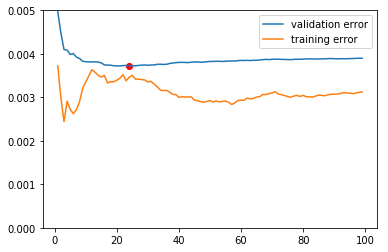

In [233]:
ax1=plt.subplot()
ax1.plot(grid_n,cv_errors,label='validation error')
ax1.plot(grid_n,train_errors,label='training error')
ax1.scatter(np.argmin(cv_errors),cv_errors[np.argmin(cv_errors)],c='red')
ax1.legend()
ax1.set_ylim(0,0.0050)
print('Minimum RMSE Validation at k:{}'.format(np.argmin(cv_errors)))

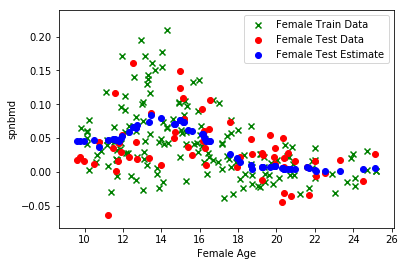

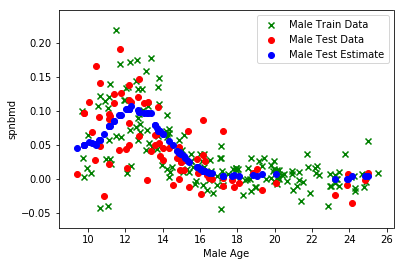

In [234]:

# split data
split_index = int(0.7 * len(bone_data_X))
bone_train = np.asarray(bone_data[:split_index])
bone_test = np.asarray(bone_data[split_index:])


# split data
bone_train_X = np.ndarray.tolist(bone_train[:,:2])
bone_train_y = np.ndarray.tolist(bone_train[:,2])
bone_test_X = np.ndarray.tolist(bone_test[:,:2])
bone_test_y = np.ndarray.tolist(bone_test[:,2])

bone_model = KNN_Regressor(bone_train_X, bone_train_y, 24)

 
bone_estimate_y = []
c = 0
for x_test in bone_test_X:
    estimate = bone_model.predict(x_test)
    bone_estimate_y.append(estimate)
       

# partition data based on male and female
male_train_X = []
male_train_y =[]
male_test_X = []
male_test_y = []
male_estimate_y = []

female_train_X = []
female_train_y =[]
female_test_X = []
female_test_y = []
female_estimate_y = []

    # separate male and female training data
for i in range(0, len(bone_train_X)):
    if bone_train_X[i][1] == 1:
        male_train_X.append(bone_train_X[i])
        male_train_y.append(bone_train_y[i])
    else:
        female_train_X.append(bone_train_X[i])
        female_train_y.append(bone_train_y[i])
    
    # separate male and female test data
for i in range(0, len(bone_test_X)):
    if bone_test_X[i][1] == 1:
        male_test_X.append(bone_test_X[i])
        male_test_y.append(bone_test_y[i])
        male_estimate_y.append(bone_estimate_y[i])
    else:
        female_test_X.append(bone_test_X[i])
        female_test_y.append(bone_test_y[i])
        female_estimate_y.append(bone_estimate_y[i])

    ## training data based on male and female
plt.figure("Female Data")
f_tr_x = plt.scatter([x[0] for x in female_train_X], female_train_y, c='g', marker='x')
f_te_x = plt.scatter([x[0] for x in female_test_X], female_test_y, c='r', marker='o')
f_te_e = plt.scatter([x[0] for x in female_test_X], female_estimate_y, c='b', marker='o')
plt.legend((f_tr_x, f_te_x, f_te_e), (
    'Female Train Data', 'Female Test Data', 'Female Test Estimate'))
plt.xlabel("Female Age")
plt.ylabel("spnbmd")

    # test data based on male and female
plt.figure("Male Data")
m_tr_x = plt.scatter([x[0] for x in male_train_X], male_train_y, c='g', marker='x')
m_te_x = plt.scatter([x[0] for x in male_test_X], male_test_y, c='r', marker='o')
m_te_e = plt.scatter([x[0] for x in male_test_X], male_estimate_y, c='b', marker='o')
plt.legend((m_tr_x, m_te_x, m_te_e), ('Male Train Data', 'Male Test Data', 'Male Test Estimate'))
plt.xlabel("Male Age")
plt.ylabel("spnbmd")

plt.show()

